### Análise do conjunto de dados Pense 2015, que trás informações sobre alunos de 11 a 19 anos.

Importação das bibliotecas e leitura do arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
from zipfile import ZipFile
caminho = "PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)

In [3]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [4]:
arquivo = zip.open(zip.namelist()[1])
dados = pd.read_csv(arquivo, sep = ";")

In [5]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,"299,735235",1,2,4,1,5,1,296


In [6]:
dados.shape

(16556, 181)

## O foco será em ver o uso do tabaco dentre os alunos e se há uma relação ou influência pelos pais.

Segundo o dicionário de dados, estaremos interessados nas colunas:
- VB01001	Qual é o seu sexo?
- VB01003	Qual é a sua idade?
- VB01022	Em que turno você estuda?
- VB04001	Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas? 
- VB04002	Que idade você tinha quando experimentou fumar cigarro pela primeira vez?
- VB04003	NOS ÚLTIMOS 30 DIAS, em quantos dias você fumou cigarros?
- VB04009	NOS ÚLTIMOS 30 DIAS, em geral, como você conseguiu seus próprios cigarros?
- VB04010	NOS ÚLTIMOS 30 DIAS, alguém se recusou a lhe vender cigarros por causa de sua idade?
- VB04008A	NOS ÚLTIMOS 30 DIAS, em quantos dias você usou outros produtos de tabaco: cigarros de palha ou enrolados a mão, charuto, cachimbo, cigarrilha, cigarro indiano ou bali, narguilé, rapé, fumo de mascar etc? (não incluir cigarro comum)
- VB04011	Qual outro produto do tabaco você usou com mais frequência NOS ÚLTIMOS 30 DIAS?
- VB04005	NOS ÚLTIMOS 7 DIAS, em quantos dias pessoas fumaram na sua presença?
- VB04006A	Algum de seus pais ou responsáveis fuma? 

Coleta de colunas de interesse, alteração do nome das colunas e criação do dicionário de dados para substituição no DataFrame

In [7]:
colunas = ["VB01001","VB01003", "VB01022", "VB04001","VB04002","VB04003", "VB04009", "VB04010", "VB04008A", "VB04011", "VB04005", "VB04006A"]
nomes_colunas = ["Sexo", "Idade", "Turno que estuda", "Já fumou", "Idade que fumou 1ª vez", "Dias que fumou 30d", "Como conseguiu 30d", "Alguém recusou vender idade 30d", "Quantos dias outros produtos 30d", "Qual produto 30d", "Outras pessoas fumaram na presença 7d", "Pais fumam?"]

In [8]:
sexo = {
    1: 'Masculino',
    2: 'Feminino'
}

turno = {
    1: 'Manhã',
    2: 'Intermediário',
    3: 'Tarde',
    4: 'Noite',
    5: 'Integral',
    99: 'Não informado'
}

ja_fumou = {
    -1: 'Pulou pergunta',
    1: 'Sim',
    2: 'Não',
    99: 'Não informado'
}

fumou_pvez = {
    -1: 'Pulou pergunta',
    99: 'Não informado'
}

dias_fumou = {
    -1: 'Pulou pergunta',
    1: 'Nenhum dia',
    2: '1-2 dias',
    3: '3-5 dias',
    4: '6-9 dias',
    5: '10-19 dias',
    6: '20-29 dias',
    7: '30 dias',
    99: 'Não informado'
}

como_conseguiu = {
    -1: 'Pulou pergunta',
    1: 'Não fumou',
    2: 'Loja ou botequim',
    3: 'Vendedor ambulante',
    4: 'Pediu outra pessoa para comprar',
    5: 'Pegou com outra pessoa',
    6: 'Pegou escondido',
    7: 'Pessoa mais velha deu',
    8: 'Outro modo',
    99: 'Não informado'
}

recusa_venda = {
    -1: 'Pulou pergunta',
    1: 'Não tentou comprar',
    2: 'Sim',
    3: 'Não',
    99: 'Não informado'
}

outros_produtos = {
    -1: 'Pulou pergunta',
    1: 'Não usou outros',
    2: 'Nenhum dia',
    3: '1-2 dias',
    4: '3-5 dias',
    5: '6-9 dias',
    6: '10-19 dias',
    7: '20-29 dias',
    8: '30 dias',
    99: 'Não informado'
}

qual_produto = {
    -1: 'Pulou pergunta',
    1: 'Cravo',
    2: 'Enrolados à mão',
    3: 'Cigarrilhas',
    4: 'Charutos',
    5: 'Fumo para mascar',
    6: 'Narguilé',
    7: 'Indianos',
    8: 'Eletrônicos',
    9: 'Outros',
    99: 'Não informado'
}

outros_fumaram_presenca = {
    -1: 'Pulou pergunta',
    1: 'Nenhum dia',
    2: '1-2 dias',
    3: '3-4 dias',
    4: '5-6 dias',
    5: '7 dias',
    99: 'Não informado'
}

responsavel_fuma = {
    -1: 'Pulou pergunta',
    1: 'Nenhum deles',
    2: 'Só o pai fuma',
    3: 'Só a mãe fuma',
    4: 'Os dois fumam',
    5: 'Não sabe',
    99: 'Não informado'
}

In [9]:
dados = dados[colunas]
dados.columns = nomes_colunas

In [10]:
dados

,Sexo,Idade,Turno que estuda,Já fumou,Idade que fumou 1ª vez,Dias que fumou 30d,Como conseguiu 30d,Alguém recusou vender idade 30d,Quantos dias outros produtos 30d,Qual produto 30d,Outras pessoas fumaram na presença 7d,Pais fumam?
0,2,13,1,2,-1,-1,-1,-1,1,-1,1,1
1,2,14,1,2,-1,-1,-1,-1,1,-1,2,2
2,1,13,1,2,-1,-1,-1,-1,1,-1,2,1
3,1,14,1,2,-1,-1,-1,-1,1,-1,1,1
4,1,13,1,2,-1,-1,-1,-1,1,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2,12,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
16552,1,15,1,2,-1,-1,-1,-1,1,-1,1,1
16553,1,13,1,2,-1,-1,-1,-1,1,-1,5,2
16554,1,14,1,2,-1,-1,-1,-1,1,-1,3,2


Criação do novo DataFrame com os dados mais legíveis.

In [11]:
df = dados.replace({'Sexo': sexo})
df = df.replace({'Turno que estuda': turno})
df = df.replace({'Já fumou': ja_fumou})
df = df.replace({'Idade que fumou 1ª vez': fumou_pvez})
df = df.replace({'Dias que fumou 30d': dias_fumou})
df = df.replace({'Como conseguiu 30d': como_conseguiu})
df = df.replace({'Alguém recusou vender idade 30d': recusa_venda})
df = df.replace({'Quantos dias outros produtos 30d': outros_produtos})
df = df.replace({'Qual produto 30d': qual_produto})
df = df.replace({'Outras pessoas fumaram na presença 7d': outros_fumaram_presenca})
df = df.replace({'Pais fumam?': responsavel_fuma})

In [12]:
df

,Sexo,Idade,Turno que estuda,Já fumou,Idade que fumou 1ª vez,Dias que fumou 30d,Como conseguiu 30d,Alguém recusou vender idade 30d,Quantos dias outros produtos 30d,Qual produto 30d,Outras pessoas fumaram na presença 7d,Pais fumam?
0,Feminino,13,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,Nenhum dia,Nenhum deles
1,Feminino,14,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,1-2 dias,Só o pai fuma
2,Masculino,13,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,1-2 dias,Nenhum deles
3,Masculino,14,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,Nenhum dia,Nenhum deles
4,Masculino,13,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,1-2 dias,Nenhum deles
...,...,...,...,...,...,...,...,...,...,...,...,...
16551,Feminino,12,Manhã,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta
16552,Masculino,15,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,Nenhum dia,Nenhum deles
16553,Masculino,13,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,7 dias,Só o pai fuma
16554,Masculino,14,Manhã,Não,Pulou pergunta,Pulou pergunta,Pulou pergunta,Pulou pergunta,Não usou outros,Pulou pergunta,3-4 dias,Só o pai fuma


In [13]:
perc_fumou = df['Já fumou'].value_counts(normalize=True)*100
perc_idade = df['Idade'].value_counts(normalize=True)*100

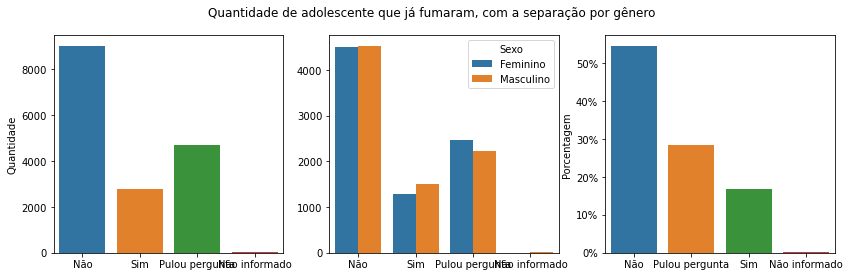

In [14]:
fig, axs = plt.subplots(1,3, figsize = (14,4))
fig.suptitle('Quantidade de adolescente que já fumaram, com a separação por gênero')
sns.countplot(x = 'Já fumou', data = df, ax = axs[0])
axs[0].set(xlabel='',ylabel='Quantidade')
sns.countplot(x = 'Já fumou', data = df, hue = 'Sexo', ax = axs[1])
axs[1].set(xlabel='',ylabel='')
sns.barplot(x=perc_fumou.index,y=perc_fumou.values,ax = axs[2])
axs[2].set(ylabel='Porcentagem')
axs[2].yaxis.set_major_formatter(ticker.PercentFormatter())
plt.show()

## Aqui podemos ver que cerca de 20% dos estudantes já fumaram e que pouco menos de 30% não quiseram responder a pergunta, levantando uma hipótese do porquê eles não responderiam caso eles não fumasses, já que não há problema em responder que não.

### Temos um conjunto bastante balanceado quanto ao sexo, e não há grandes diferenças se é do sexo Masculino ou Feminino.

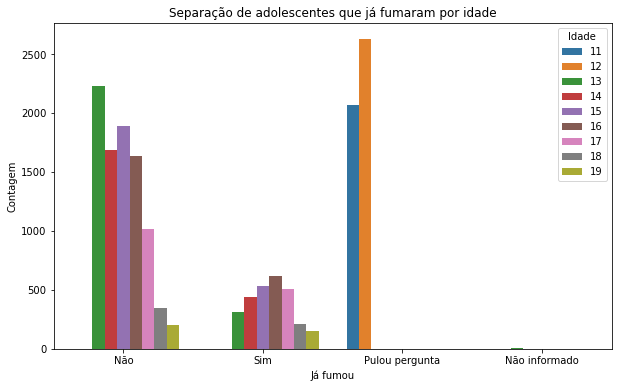

In [15]:
plt.figure(figsize=(10,6))
plt.title('Separação de adolescentes que já fumaram por idade')
ax = sns.countplot(x='Já fumou', data = df, hue = 'Idade')
ax.set(ylabel = 'Contagem')
plt.show()

## Através desse gráfico, vemos que somente os alunos de 11 e 12 anos pularam a pergunta, e nenhum deles respondeu que sim ou que não. Talvez a pesquisa tenha direcionado para que esses alunos não respondessem a essa pergunta por serem muito novos, ou talvez todos eles tenham se sentido inseguros a responder.

## A primeira hipótese parece fazer mais sentido, a de que a pesquisa não direcionou essa pergunta a esses alunos.

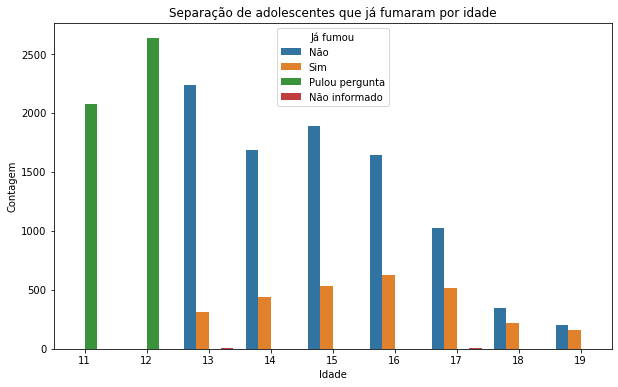

In [16]:
plt.figure(figsize=(10,6))
plt.title('Separação de adolescentes que já fumaram por idade')
ax = sns.countplot(x='Idade', data = df, hue = 'Já fumou')
ax.set(ylabel = 'Contagem')
plt.show()

## Aqui vemos que a tendência é de aumentar a proporção entre fumou/não fumou a medida que a idade é maior, mas através desse gráfico não temos uma ideia tão clara, parece que a quantidade de alunos por idade não é tão homogênea após certa idade, mas ainda não sabemos ao certo essa distribuição.

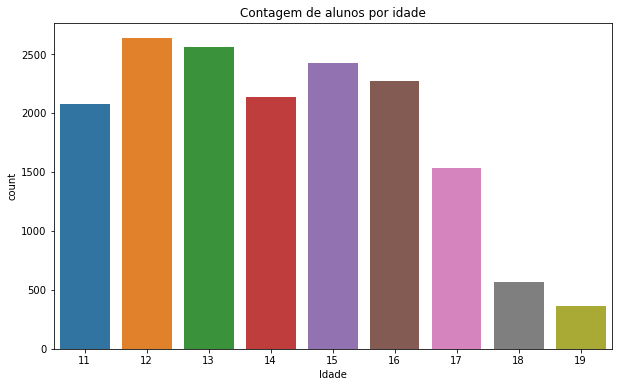

In [17]:
plt.figure(figsize=(10,6))
plt.title('Contagem de alunos por idade')
sns.countplot(x = 'Idade', data = df)
plt.show()

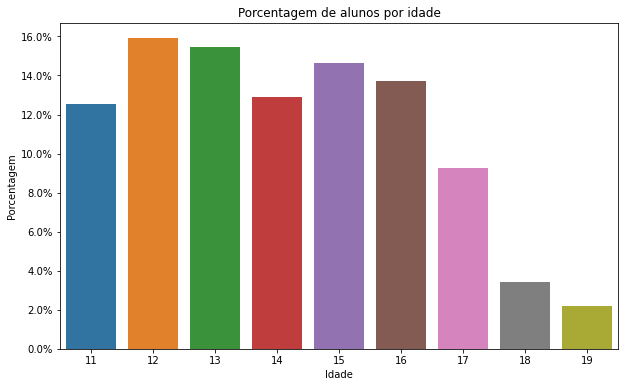

In [18]:
plt.figure(figsize=(10,6))
plt.title('Porcentagem de alunos por idade')
ax = sns.barplot(x=perc_idade.index,y=perc_idade.values)
ax.set(ylabel='Porcentagem', xlabel = 'Idade')
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

## Aqui já temos uma boa ideia de como se comporta a distribuição dos alunos por idade e ela é mais ou menos homogênea até os 16-17 anos.

### Vamos ver a porcentagem de alunos que fumam por idade e ver se é crescente/descrescente e qual essa taxa.

In [19]:
total_por_idade = df.value_counts('Idade')
somente_fumaram = df.loc[df['Já fumou']=='Sim'].value_counts('Idade')
fum_id = pd.concat([total_por_idade,somente_fumaram],axis=1)
fum_id.columns = ['Total por idade', 'Fumantes']
fum_id.fillna(0)
fum_id['Percentual'] = (fum_id['Fumantes']/fum_id['Total por idade'])*100
fum_id.fillna(0)

,Total por idade,Fumantes,Percentual
Idade,,,
11,2072,0.0,0.000000
12,2634,0.0,0.000000
13,2561,316.0,12.338930
14,2133,443.0,20.768870
15,2425,533.0,21.979381
16,2270,625.0,27.533040
17,1537,513.0,33.376708
18,563,216.0,38.365897
19,361,157.0,43.490305


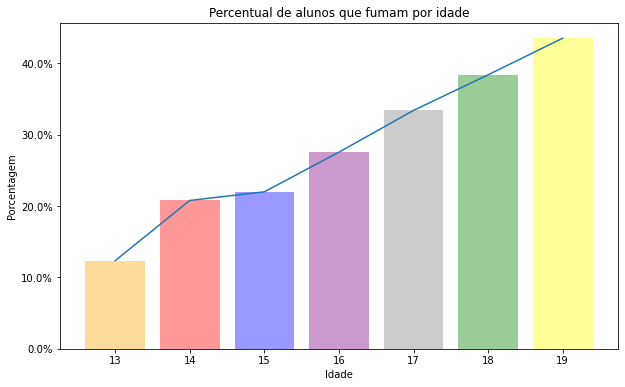

In [20]:
fig, ax = plt.subplots(figsize=(10,6),sharey= True)
ax.plot(fum_id.index, fum_id['Percentual'])
ax.bar(fum_id.index, fum_id['Percentual'], alpha = 0.4, color = ['green','yellow','orange','red','blue','purple','grey'])
plt.title('Percentual de alunos que fumam por idade')
ax.set(xlabel='Idade',ylabel='Porcentagem')
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.show();

### Aqui conseguimos ver a taxa de crescimento ao longo da idade dos alunos que fumam, bem mais visível que nos gráficos anteriores.

#### Vamos checar em que idade os alunos começaram a fumar.

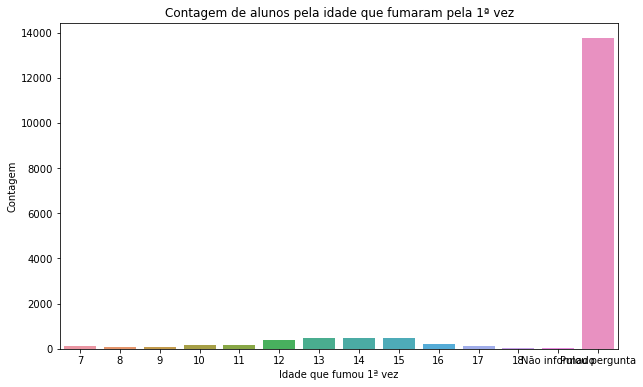

In [21]:
plt.figure(figsize=(10,6))
plt.title('Contagem de alunos pela idade que fumaram pela 1ª vez')
ax = sns.countplot(x = 'Idade que fumou 1ª vez', data = df, order = [7, 8, 9, 10, 11,12,13,14,15,16,17,18,'Não informado','Pulou pergunta'])
ax.set(ylabel = 'Contagem')
plt.show()

### Aqui não conseguimos tirar nenhuma conclusão, uma vez que a quantidade de pessoas que pularam a pergunta foi muito alta, levantando mais uma hipótese de não terem se sentido confortáveis em responder a esse tipo de pergunta.

#### Vamos eliminar esse valor discrepante para conseguir analisar as outras informações.

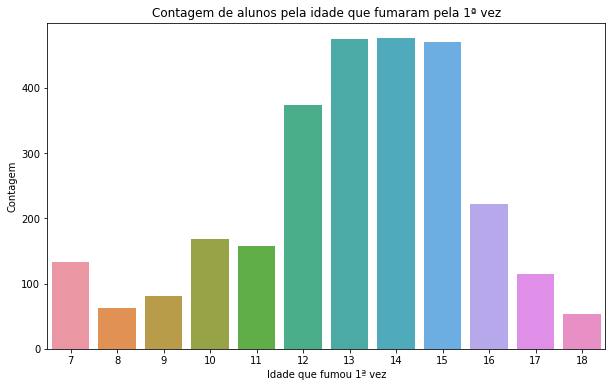

In [22]:
plt.figure(figsize=(10,6))
plt.title('Contagem de alunos pela idade que fumaram pela 1ª vez')
ax = sns.countplot(x = 'Idade que fumou 1ª vez', data = df, order = [7, 8, 9, 10, 11,12,13,14,15,16,17,18])
ax.set(ylabel = 'Contagem')
plt.show()

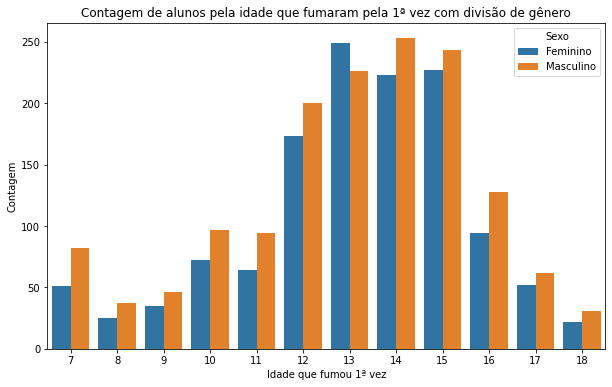

In [23]:
plt.figure(figsize=(10,6))
plt.title('Contagem de alunos pela idade que fumaram pela 1ª vez com divisão de gênero')
ax = sns.countplot(x = 'Idade que fumou 1ª vez', data = df, order = [7, 8, 9, 10, 11,12,13,14,15,16,17,18], hue = 'Sexo')
ax.set(ylabel = 'Contagem')
plt.show()

### Agora conseguimos observar que há uma concentração nas idades entre 13 a 15 anos dentre as pessoas que responderam e isso pode refletir na faixa etária mediana de onde os adolescentes começam a fumar.

#### Mas há ainda muitos dados onde relatam que começaram a fumar por volta de 7 anos de idade. O que é algo muito preocupante para a saúde dessas crianças.

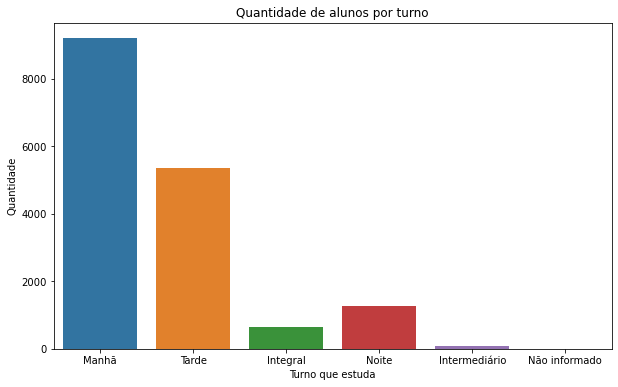

In [24]:
plt.figure(figsize = (10,6))
plt.title('Quantidade de alunos por turno')
ax = sns.countplot(x='Turno que estuda', data = df)
ax.set(ylabel='Quantidade')
plt.show()

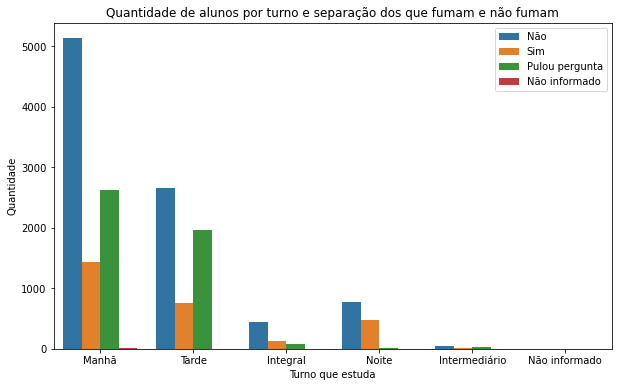

In [25]:
plt.figure(figsize = (10,6))
plt.title('Quantidade de alunos por turno e separação dos que fumam e não fumam')
ax = sns.countplot(x='Turno que estuda', data = df, hue = 'Já fumou')
plt.legend(loc=1)
ax.set(ylabel='Quantidade')
plt.show()

In [26]:
total_por_turno = df.value_counts('Turno que estuda')
somente_fumaram = df.loc[df['Já fumou']=='Sim'].value_counts('Turno que estuda')
fum_id = pd.concat([total_por_turno,somente_fumaram],axis=1)
fum_id.columns = ['Total por turno', 'Fumantes']
fum_id.fillna(0)
fum_id['Percentual'] = (fum_id['Fumantes']/fum_id['Total por turno'])*100
fum_id.fillna(0)

,Total por turno,Fumantes,Percentual
Manhã,9198,1439.0,15.644705
Tarde,5362,751.0,14.005968
Noite,1258,477.0,37.917329
Integral,651,124.0,19.047619
Intermediário,83,12.0,14.457831
Não informado,4,0.0,0.000000


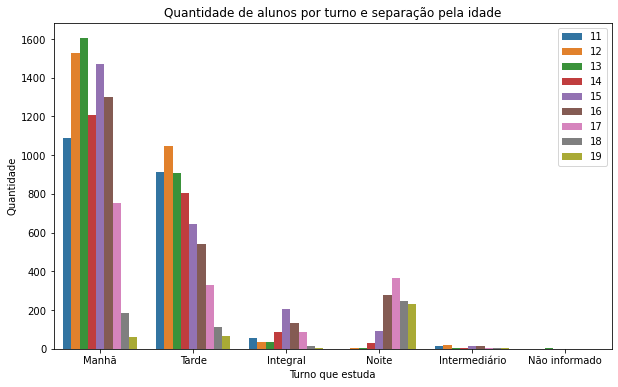

In [27]:
plt.figure(figsize = (10,6))
plt.title('Quantidade de alunos por turno e separação pela idade')
ax = sns.countplot(x='Turno que estuda', data = df, hue = 'Idade')
plt.legend(loc=1)
ax.set(ylabel='Quantidade')
plt.show()

## Vemos através dos gráficos e da tabela que a proporção de alunos da noite são mais velhos e isso reflete o porquê de os alunos do turno da noite ter uma proporção maior de fumantes em relação a não fumantes (Em proporção e não quantidade).

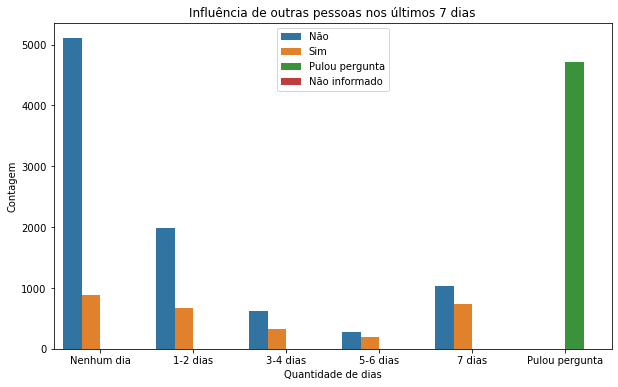

In [28]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Outras pessoas fumaram na presença 7d', data = df, hue = 'Já fumou',order=['Nenhum dia','1-2 dias','3-4 dias','5-6 dias','7 dias', 'Pulou pergunta'])
plt.title('Influência de outras pessoas nos últimos 7 dias')
ax.set(ylabel='Contagem', xlabel = 'Quantidade de dias')
ax.legend(loc=9)
plt.show()

In [29]:
total_influencia = df.value_counts('Outras pessoas fumaram na presença 7d')
somente_fumaram = df.loc[df['Já fumou']=='Sim'].value_counts('Outras pessoas fumaram na presença 7d')
fum_id = pd.concat([total_influencia,somente_fumaram],axis=1)
fum_id.columns = ['Influência 7 dias', 'Fumantes']
fum_id['Percentual'] = (fum_id['Fumantes']/fum_id['Influência 7 dias'])*100
fum_id = fum_id.fillna(0)
fum_id['Ordenar'] = [2,0,3,6,4,5,1]
fum_id = fum_id.sort_values('Ordenar')
fum_id.pop('Ordenar')
fum_id

,Influência 7 dias,Fumantes,Percentual
Pulou pergunta,4706,0.0,0.000000
Não informado,36,5.0,13.888889
Nenhum dia,5987,881.0,14.715216
1-2 dias,2662,671.0,25.206612
3-4 dias,942,321.0,34.076433
5-6 dias,466,195.0,41.845494
7 dias,1757,730.0,41.548093


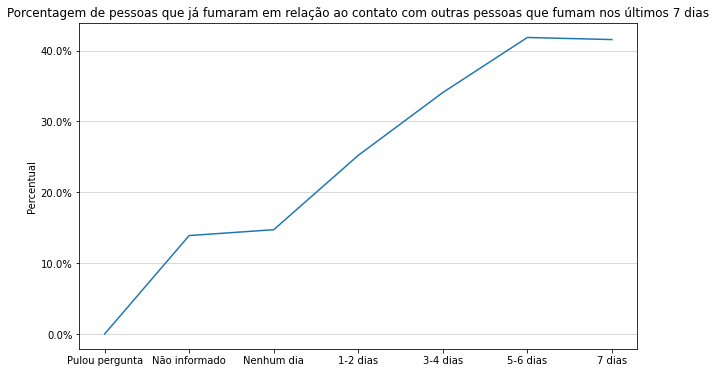

In [30]:
plt.figure(figsize = (10,6))
plt.title('Porcentagem de pessoas que já fumaram em relação ao contato com outras pessoas que fumam nos últimos 7 dias')
ax = sns.lineplot(x = fum_id.index,y = 'Percentual', data = fum_id)
plt.grid(axis = 'y', alpha = 0.6)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

## Aqui vemos mais claramente a influência ao ter contato diariamente com pessoas que fumam. Quanto mais tempo em contato com pessoas que fumam, maior a porcentagem de alunos que já fumaram alguma vez na vida.

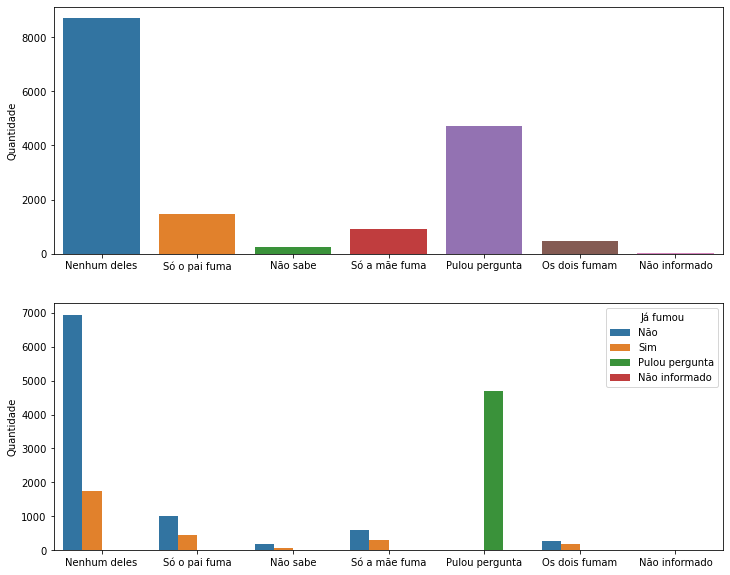

In [31]:
fig, axs = plt.subplots(2,1, figsize = (12,10))
fig.suptitle('')
sns.countplot(x = 'Pais fumam?', data = df, ax = axs[0])
sns.countplot(x = 'Pais fumam?', data = df, hue = 'Já fumou', ax = axs[1])
axs[0].set(xlabel='',ylabel='Quantidade')
axs[1].set(xlabel='',ylabel='Quantidade')
plt.show()

In [32]:
total_influencia_pais = df.value_counts('Pais fumam?')
somente_fumaram = df.loc[df['Já fumou']=='Sim'].value_counts('Pais fumam?')
fum_id = pd.concat([total_influencia_pais,somente_fumaram],axis=1)
fum_id.columns = ['Influência dos pais', 'Fumantes']
fum_id['Percentual'] = (fum_id['Fumantes']/fum_id['Influência dos pais'])*100
fum_id = fum_id.fillna(0)
fum_id

,Influência dos pais,Fumantes,Percentual
Nenhum deles,8688,1754.0,20.188766
Pulou pergunta,4706,0.0,0.000000
Só o pai fuma,1470,449.0,30.544218
Só a mãe fuma,925,318.0,34.378378
Os dois fumam,469,199.0,42.430704
Não sabe,268,78.0,29.104478
Não informado,30,5.0,16.666667


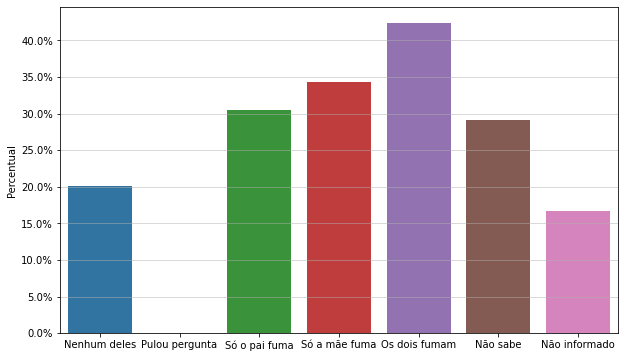

In [33]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x = fum_id.index, y='Percentual', data = fum_id)
plt.grid(axis = 'y', alpha = 0.6)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

## Para finalizar, vemos que a influência dos pais também é significativa, visto que se o pai fuma ou a mãe fuma, há uma tendência maior para que o aluno já tenha fumado alguma vez, e se ambos os pais fumam essa tendência é ainda maior.

### Talvez essa tenha sido a origem para que o aluno tenha começado a fumar ou tenha sido influenciado por outros alunos na escola, mas ainda assim o fato de os pais já serem fumantes acaba criando uma visão de aquilo não ser tão negativo e facilitar o acesso daquele aluno à prática de fumar.